# Visualizing Scientific Data 

The global land temperature dataset contains hundreds of thousands of measurements. Discovering patterns in this data can very difficult. However, it becomes a lot easier if we visualize it.

<center><img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Global_Temperature_Anomaly_-_slower-500.gif/640px-Global_Temperature_Anomaly_-_slower-500.gif'><center>

## Getting Started: Importing Libraries and Loading Data

First, we'll import `matplotlib.pyplot` for plotting and `pandas` for data manipulation. Most of the Matplotlib functions lies under the `pyplot` submodule, and are usually imported as `plt`. Then, we'll load our global temperatures dataset.

**Import Numpy and Pandas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We will use the same dataset as before which contains temperatures from cities all over the world going back to the mid-1700's. Let's see how temperatures have changed over the years.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/global_temps.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


**Run this cell to filter the original dataset and change the column names.**

In [10]:
temps = data[['dt', 'AverageTemperature', 'City', 'Country']]
temps.columns = ['date','ave_temp', 'city', 'country']
temps.head()

,date,ave_temp,city,country
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire


### Datetime

When working with "time series" data such as this, it is useful to change the index to datetime. This will allow us to plot the data by time.

In [11]:
###
temps.index = pd.to_datetime(temps['date'])
del temps['date']  # delete the original 'date' column
###
temps.head()

,ave_temp,city,country
date,,,
1849-01-01,26.704,Abidjan,Côte D'Ivoire
1849-02-01,27.434,Abidjan,Côte D'Ivoire
1849-03-01,28.101,Abidjan,Côte D'Ivoire
1849-04-01,26.140,Abidjan,Côte D'Ivoire
1849-05-01,25.427,Abidjan,Côte D'Ivoire


### Get the temperatures for Chicago

Make a new dataframe called `chicago` that contains only the entries for the city of Chicago.

In [12]:
condition = temps['city'] == 'Chicago'
chicago = temps[condition]
chicago.head()

,ave_temp,city,country
date,,,
1743-11-01,5.436,Chicago,United States
1743-12-01,NaN,Chicago,United States
1744-01-01,NaN,Chicago,United States
1744-02-01,NaN,Chicago,United States
1744-03-01,NaN,Chicago,United States


### Dealing with Missing Values

As you can see in our `chicago` dataframe, we have some `ave_temp` entries labelled `NaN`. Missing values are often represented as `NaN` (Not a Number) in Pandas. Missing data can cause issues with calculations, visualizations, and many data analysis techniques.

The `dropna()` function in Pandas is used to **remove rows or columns that contain missing (NaN) values** from a dataframe. It's a quick way to clean up your data, though you need to be cautious as it can lead to significant data loss if many values are missing. `.dropna()` without any arguments can be rather agressive.

In [14]:
chicago_clean = chicago.dropna()
chicago_clean.head()

,ave_temp,city,country
date,,,
1743-11-01,5.436,Chicago,United States
1744-04-01,8.766,Chicago,United States
1744-05-01,11.605,Chicago,United States
1744-06-01,17.965,Chicago,United States
1744-07-01,21.680,Chicago,United States


## How a Plot is Constructed: A Step-by-Step Guide

When you create a plot using Matplotlib, you're essentially building an image layer by layer. Let's break down the fundamental components and the typical workflow:

**1. The Data**

The data typically comes in the form of lists, arrays, or columns in a dataframe.

In [37]:
###
x_data = chicago_clean.index
y_data = chicago_clean['ave_temp']
###

**2. The Plotting Function: Drawing Your Data**

This is where you tell Matplotlib how to represent your data. Based on the type of relationship or distribution you want to show, you choose a specific function. Here we will create a line plot by using the `plot()` function:

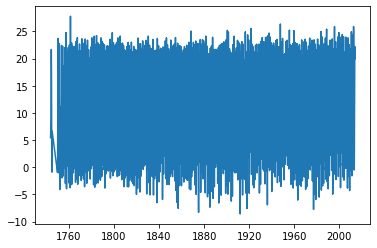

In [38]:
###
plt.plot(x_data, y_data)
plt.show()
###

**3. Labelling Your Plot**

Adding a title and labelling the axes are essential to making a plot. We will add some matplotlib functions to do this. We need to repeat the plotting functions from the previous cell because matplotlib builds the plot this way.

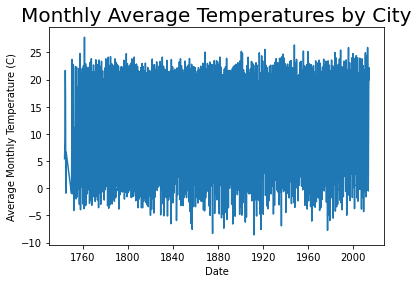

In [39]:
plt.plot(x_data, y_data)

###
plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
###

plt.show()

**4. Adding a Legend**

If you have multiple data series on one plot, `plt.legend()` uses the `label=` argument from your plotting functions to create a key.

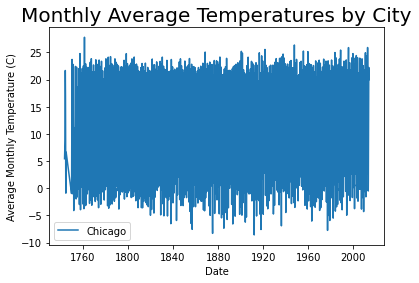

In [40]:
plt.plot(x_data, y_data, label='Chicago')

plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
###
plt.legend()
###

plt.show()

**5. Figure Size**

Control the overall size of your plot window (the "Figure") using `plt.figure(figsize=(width, height))` before any plotting commands. This is useful for making plots larger for presentations or smaller for embedding.

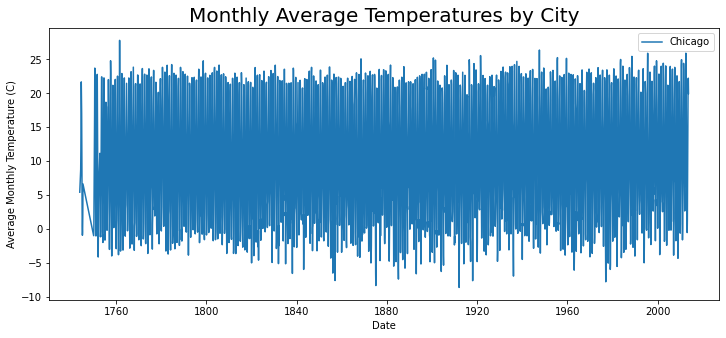

In [41]:
# Set a figure size of 12 inches wide and 5 inches tall
###
plt.figure(figsize= (12, 5))
###

plt.plot(x_data, y_data, label='Chicago')

plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
plt.legend()

plt.show()

**6. Select a time frame**

With the index set to `datetime`, we can plot a smaller timeframe. However, since the x and y data will be a subset of the original dataset, we have to update the plotting function.

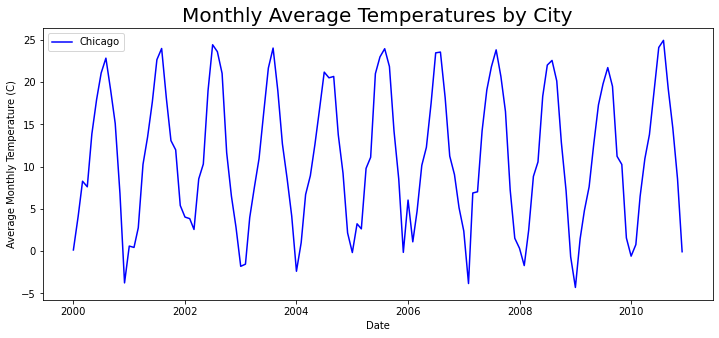

In [62]:
# Make a subset of the data from January 2000 to December 2010
###
chicago2 = chicago_clean['2000-01-01':'2010-12-31']
###

plt.figure(figsize= (12, 5))

# Update the x and y
###
plt.plot(chicago2.index, chicago2['ave_temp'], label='Chicago', color='blue')
###

plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
plt.legend()

plt.show()

### Rolling Means

Scientific data can be very "noisy". In this case, it is difficult to see trends because of seasonal temperature fluctuations. We can smooth it out using a **rolling mean**. This will average the temperatures within a certain window of time. Let's use the original dataframe for Chicago to make this plot.

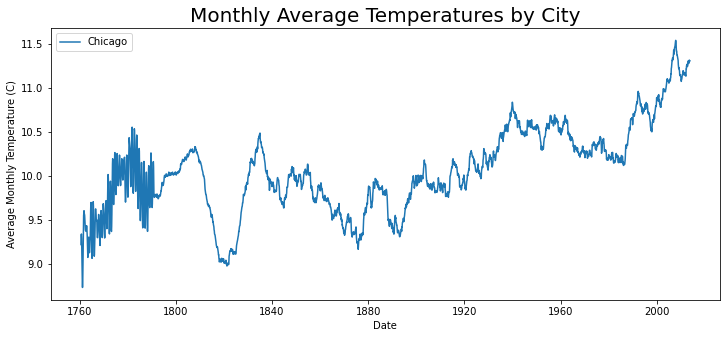

In [63]:
plt.figure(figsize= (12, 5))

# Average the temperatures using the 10 year (120 month) rolling mean
###
plt.plot(chicago_clean.index, chicago_clean['ave_temp'].rolling(120).mean(), label='Chicago')
###

plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
plt.legend()

plt.show()

### Appearance

Now that we have a better looking plot, we can customize its appearance in a number of ways. Here are just a few of many options. There are added as arguments to the `plot()` function after the `x`, `y`:
- Colors: `color='red'`
- Line Styles: `linestyle='--'` (dashed), `'-'` (solid)
- Markers: `marker='o'` (circles), `'s'` (squares)
- Grid: `plt.grid(True)`


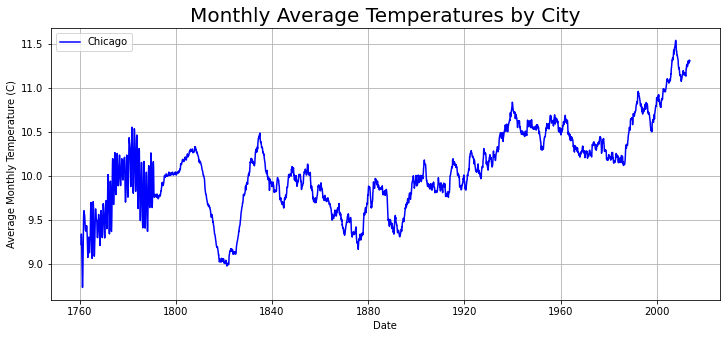

In [66]:
plt.figure(figsize= (12, 5))

###
plt.plot(chicago_clean.index, chicago_clean['ave_temp'].rolling(120).mean(), label='Chicago', color='blue', linestyle='-')
plt.grid(True)
###

plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
plt.legend()

plt.show()

## Plotting Multiple Lines

We can plot multiple lines on the same plot. This is very useful for comparing trends. By making the variable `city2` we can easily change the city in one spot and not have to change it the code that follows.

We will add a second line to our plot for Paris, France. 

In [67]:
###
city2 = 'Paris'
###

In [68]:
###
condition2 = temps['city'] == city2
city2_temps = temps[condition2]
###
city2_temps.head()

,ave_temp,city,country
date,,,
1743-11-01,7.648,Paris,France
1743-12-01,NaN,Paris,France
1744-01-01,NaN,Paris,France
1744-02-01,NaN,Paris,France
1744-03-01,NaN,Paris,France


In [69]:
# Remove the missing entries
city2_temps_clean = city2_temps.dropna()

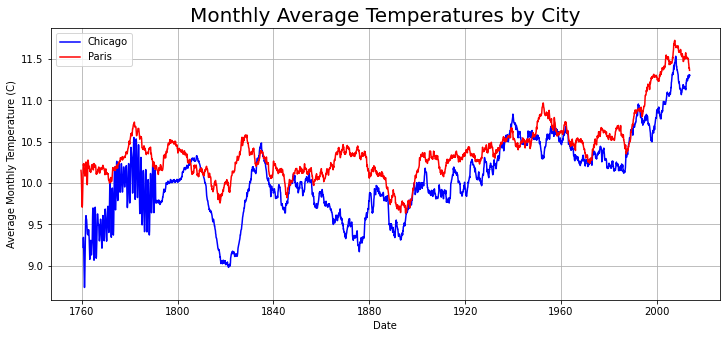

In [70]:
plt.figure(figsize= (12, 5))
plt.plot(chicago_clean.index, chicago_clean['ave_temp'].rolling(120).mean(), label='Chicago', color='blue')

# Add a line for city2
###
plt.plot(city2_temps_clean.index, city2_temps_clean['ave_temp'].rolling(120).mean(), label=city2, color='red')
###

plt.title("Monthly Average Temperatures by City", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Average Monthly Temperature (C)')
plt.grid(True)
plt.legend()

plt.show()

# Now it's your turn

Now you have the tools to dive into some exploration and visualization of global temperatures. Take some time to investigate some of the questions circling in your head!